TOTEX Calculator - All costs and benefits will be adjusted for inflation.


Project duration [14] (Number of years for the project):  
Discount rate [0.1] (Rate used to calculate present value of future cash flows):  
Inflation rate [0.03] (Annual rate of price increase (applied to all costs and benefits)):  
Do you want to monitor progress? (y/n):  
Initial CAPEX [1000000] (Initial capital expenditure for the project):  
Routine maintenance [50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000] (Annual routine maintenance costs (will be adjusted for inflation)):  
Non-routine maintenance [100000,0,0,200000,0,0,300000,0,0,400000,0,0,500000,0] (Periodic major maintenance costs (will be adjusted for inflation)):  
Other OPEX [20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000] (Other annual operational expenditures (will be adjusted for inflation)):  
Revenue [200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000] (Annual revenue generated by the project (


Results:
Total Cost (NPV): £4,107,593.50
Total Benefit (NPV): £4,271,581.04
Net Benefit (NPV): £163,987.54
Final Cumulative Value: £266,784.90
Project Financially Beneficial: Yes
Breakeven Time: Year 9


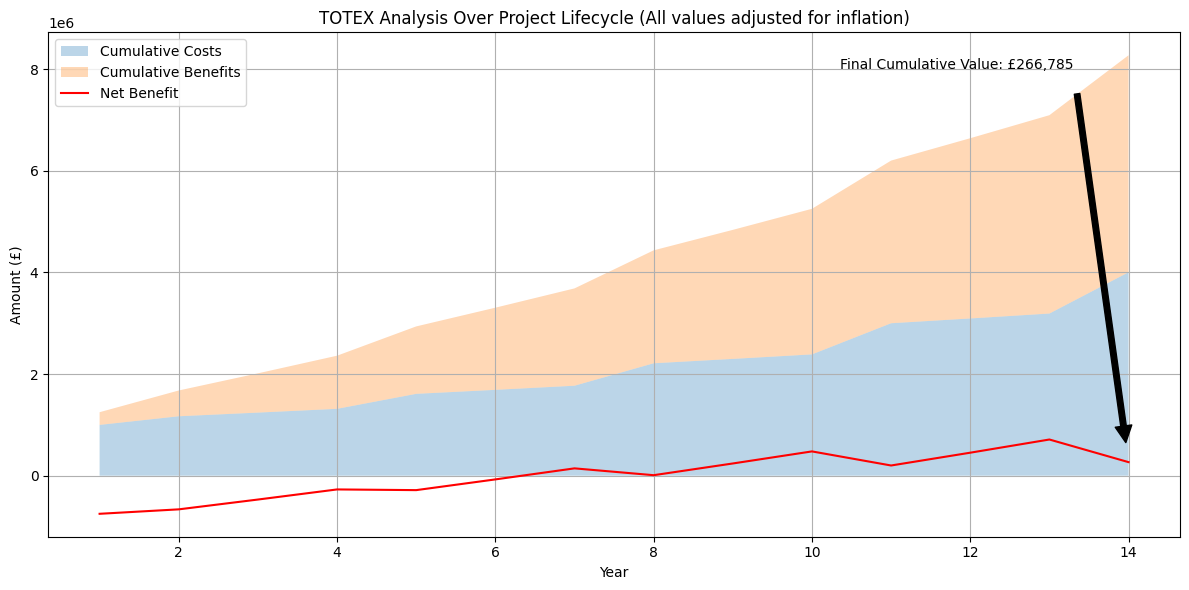

In [6]:
# Copyright (c) 2025 Diran Edwards
# All rights reserved.
#
# This source code is licensed under the GNU Affero General Public License v3.0 license found in the
# LICENSE file in the root directory of this source tree.
#

import numpy as np
import matplotlib.pyplot as plt
from time import sleep

def npv(rate, cashflows):
    return sum(cf / (1 + rate)**i for i, cf in enumerate(cashflows))

class ProgressMonitor:
    def __init__(self, total_steps, interval):
        self.total_steps = total_steps
        self.interval = interval
        self.current_step = 0

    def update(self, step, data):
        self.current_step = step
        if step % self.interval == 0 or step == self.total_steps:
            print(f"Progress: {step}/{self.total_steps} - Current data: {data}")

class TOTEXCalculator:
    def __init__(self, project_duration, discount_rate, inflation_rate, progress_monitor=None):
        self.project_duration = project_duration
        self.discount_rate = discount_rate
        self.inflation_rate = inflation_rate
        self.progress_monitor = progress_monitor

    def calculate_npv(self, cash_flows):
        return npv(self.discount_rate, cash_flows)

    def apply_inflation(self, value, year):
        return value * (1 + self.inflation_rate) ** year

    def calculate_totex(self, initial_capex, routine_maintenance, non_routine_maintenance, other_opex, revenue, savings):
        total_cost = 0
        total_benefit = 0
        breakeven_year = None
        
        for year in range(self.project_duration):
            # Simulate some calculation time
            sleep(0.1)
            
            # Apply inflation to all OPEX-related costs and benefits
            year_cost = (initial_capex if year == 0 else 0) + \
                        self.apply_inflation(routine_maintenance[year], year) + \
                        self.apply_inflation(non_routine_maintenance[year], year) + \
                        self.apply_inflation(other_opex[year], year)
            year_benefit = self.apply_inflation(revenue[year], year) + \
                           self.apply_inflation(savings[year], year)
            
            total_cost += self.calculate_npv([year_cost])
            total_benefit += self.calculate_npv([year_benefit])
            net_benefit = total_benefit - total_cost
            
            if net_benefit > 0 and breakeven_year is None:
                breakeven_year = year + 1
            
            if self.progress_monitor:
                self.progress_monitor.update(year + 1, {
                    'year': year + 1,
                    'current_cost': total_cost,
                    'current_benefit': total_benefit,
                    'net_benefit': net_benefit
                })

        return {
            'total_cost': total_cost,
            'total_benefit': total_benefit,
            'net_benefit': net_benefit,
            'financially_beneficial': net_benefit > 0,
            'breakeven_year': breakeven_year
        }

def get_input(prompt, default, explanation):
    user_input = input(f"{prompt} [{default}] ({explanation}): ").strip()
    return default if user_input == "" else float(user_input)

def get_list_input(prompt, default, explanation):
    user_input = input(f"{prompt} [{','.join(map(str, default))}] ({explanation}): ").strip()
    return default if user_input == "" else [float(x) for x in user_input.split(',')]

print("TOTEX Calculator - All costs and benefits will be adjusted for inflation.")

# Get user inputs
project_duration = int(get_input("Project duration", 14, "Number of years for the project"))
discount_rate = get_input("Discount rate", 0.10, "Rate used to calculate present value of future cash flows")
inflation_rate = get_input("Inflation rate", 0.03, "Annual rate of price increase (applied to all costs and benefits)")

# Ask if the user wants to use the progress monitor
use_monitor = input("Do you want to monitor progress? (y/n): ").lower().strip() == 'y'
monitor_interval = 1
if use_monitor:
    monitor_interval = int(get_input("Progress update interval", 1, "Number of years between progress updates"))
    progress_monitor = ProgressMonitor(project_duration, monitor_interval)
else:
    progress_monitor = None

calculator = TOTEXCalculator(project_duration, discount_rate, inflation_rate, progress_monitor)

initial_capex = get_input("Initial CAPEX", 1000000, "Initial capital expenditure for the project")
routine_maintenance = get_list_input("Routine maintenance", [50000] * project_duration, "Annual routine maintenance costs (will be adjusted for inflation)")
non_routine_maintenance = get_list_input("Non-routine maintenance", [100000, 0, 0, 200000, 0, 0, 300000, 0, 0, 400000, 0, 0, 500000, 0][:project_duration], "Periodic major maintenance costs (will be adjusted for inflation)")
other_opex = get_list_input("Other OPEX", [20000] * project_duration, "Other annual operational expenditures (will be adjusted for inflation)")
revenue = get_list_input("Revenue", [200000] * project_duration, "Annual revenue generated by the project (will be adjusted for inflation)")
savings = get_list_input("Savings", [50000] * project_duration, "Annual savings realized by the project (will be adjusted for inflation)")

result = calculator.calculate_totex(
    initial_capex,
    routine_maintenance,
    non_routine_maintenance,
    other_opex,
    revenue,
    savings
)

# Prepare data for plotting
years = range(1, project_duration + 1)
costs = [initial_capex] + [calculator.apply_inflation(r + n + o, i) 
                           for i, (r, n, o) in enumerate(zip(routine_maintenance, non_routine_maintenance, other_opex))]
benefits = [calculator.apply_inflation(r + s, i) 
            for i, (r, s) in enumerate(zip(revenue, savings))]

# Ensure costs and benefits have the same length
max_length = max(len(costs), len(benefits))
costs = costs + [0] * (max_length - len(costs))
benefits = benefits + [0] * (max_length - len(benefits))

cumulative_costs = np.cumsum(costs)
cumulative_benefits = np.cumsum(benefits)
net_benefit = cumulative_benefits - cumulative_costs

# Trim to project duration if necessary
if len(cumulative_costs) > project_duration:
    cumulative_costs = cumulative_costs[:project_duration]
    cumulative_benefits = cumulative_benefits[:project_duration]
    net_benefit = net_benefit[:project_duration]
    years = range(1, project_duration + 1)

print(f"\nResults:")
print(f"Total Cost (NPV): £{result['total_cost']:,.2f}")
print(f"Total Benefit (NPV): £{result['total_benefit']:,.2f}")
print(f"Net Benefit (NPV): £{result['net_benefit']:,.2f}")
print(f"Final Cumulative Value: £{net_benefit[-1]:,.2f}")
print(f"Project Financially Beneficial: {'Yes' if result['financially_beneficial'] else 'No'}")
if result['breakeven_year']:
    print(f"Breakeven Time: Year {result['breakeven_year']}")
else:
    print("The project does not break even within the given duration.")

# Create the plot
plt.figure(figsize=(12, 6))
plt.fill_between(years, 0, cumulative_costs, alpha=0.3, label='Cumulative Costs')
plt.fill_between(years, cumulative_costs, cumulative_benefits + cumulative_costs, alpha=0.3, label='Cumulative Benefits')
plt.plot(years, net_benefit, 'r-', label='Net Benefit')

plt.title('TOTEX Analysis Over Project Lifecycle (All values adjusted for inflation)')
plt.xlabel('Year')
plt.ylabel('Amount (£)')
plt.legend()
plt.grid(True)

# Add annotation for Final Cumulative Value
plt.annotate(f'Final Cumulative Value: £{net_benefit[-1]:,.0f}', 
             xy=(years[-1], net_benefit[-1]), 
             xytext=(0.7, 0.95), 
             textcoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='left', 
             verticalalignment='top')


plt.tight_layout()
plt.show()


TOTEX Calculator - Costs and revenues/savings will be adjusted for inflation separately.


Project duration [14] (Number of years for the project):  
Discount rate [0.109] (Rate used to calculate present value of future cash flows):  0.1
Cost inflation rate [0.03] (Annual rate of price increase for costs):  0.0
Revenue inflation rate [0.02] (Annual rate of price increase for revenue and savings):  0.0
Do you want to monitor progress? (y/n):  
Initial CAPEX [1000000] (Initial capital expenditure for the project):  
Routine maintenance [50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000] (Annual routine maintenance costs (will be adjusted for cost inflation)):  
Non-routine maintenance [100000,0,0,200000,0,0,300000,0,0,400000,0,0,500000,0] (Periodic major maintenance costs (will be adjusted for cost inflation)):  
Other OPEX [20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000] (Other annual operational expenditures (will be adjusted for cost inflation)):  
Revenue [200000,200000,200000,200000,200000,200000,20000


Results:
Total Cost (NPV): £3,480,000.00
Total Benefit (NPV): £3,500,000.00
Net Benefit (NPV): £20,000.00
Final Cumulative Value: £90,000.00
Project Financially Beneficial: Yes
Breakeven Time: Year 9


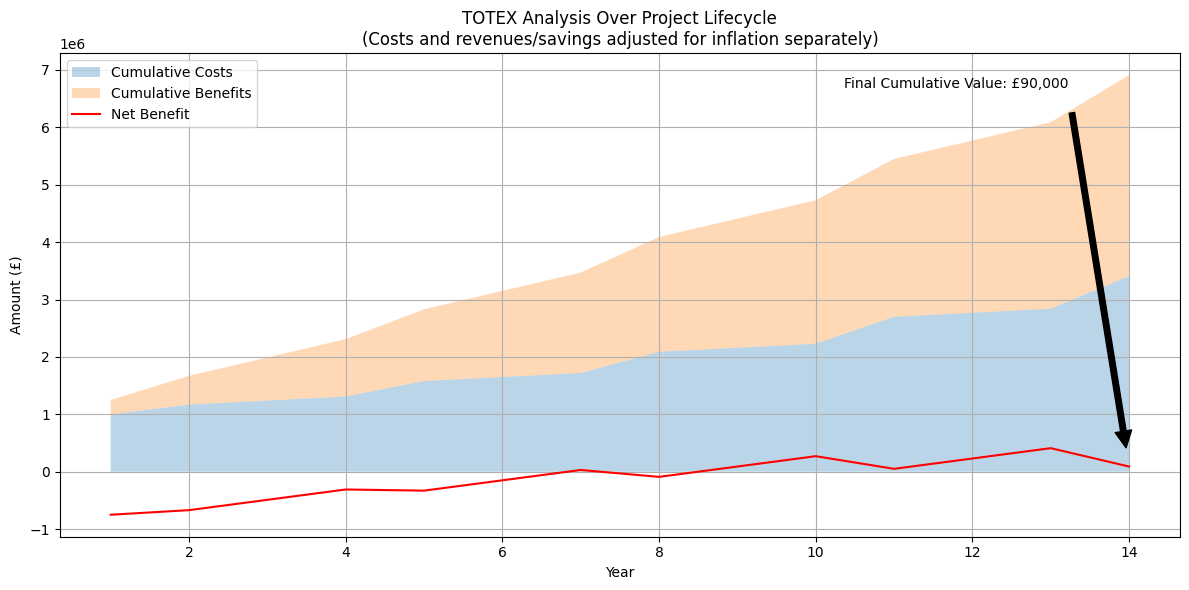

In [4]:
# Copyright (c) 2025 Diran Edwards
# All rights reserved.
#
# This source code is licensed under the GNU Affero General Public License v3.0 license found in the
# LICENSE file in the root directory of this source tree.
#

# This version of the TOTEX calculator allows for a more nuanced analysis where costs might increase 
# at a different rate than revenues and savings. This can be particularly useful in scenarios where, 
# for example, operational costs might increase faster than the ability to raise prices or realize savings

import numpy as np
import matplotlib.pyplot as plt
from time import sleep

def npv(rate, cashflows):
    return sum(cf / (1 + rate)**i for i, cf in enumerate(cashflows))

class ProgressMonitor:
    def __init__(self, total_steps, interval):
        self.total_steps = total_steps
        self.interval = interval
        self.current_step = 0

    def update(self, step, data):
        self.current_step = step
        if step % self.interval == 0 or step == self.total_steps:
            print(f"Progress: {step}/{self.total_steps} - Current data: {data}")

class TOTEXCalculator:
    def __init__(self, project_duration, discount_rate, cost_inflation_rate, revenue_inflation_rate, progress_monitor=None):
        self.project_duration = project_duration
        self.discount_rate = discount_rate
        self.cost_inflation_rate = cost_inflation_rate
        self.revenue_inflation_rate = revenue_inflation_rate
        self.progress_monitor = progress_monitor

    def calculate_npv(self, cash_flows):
        return npv(self.discount_rate, cash_flows)

    def apply_cost_inflation(self, value, year):
        return value * (1 + self.cost_inflation_rate) ** year

    def apply_revenue_inflation(self, value, year):
        return value * (1 + self.revenue_inflation_rate) ** year

    def calculate_totex(self, initial_capex, routine_maintenance, non_routine_maintenance, other_opex, revenue, savings):
        total_cost = 0
        total_benefit = 0
        breakeven_year = None
        
        for year in range(self.project_duration):
            # Simulate some calculation time
            sleep(0.1)
            
            # Apply inflation to costs and benefits separately
            year_cost = (initial_capex if year == 0 else 0) + \
                        self.apply_cost_inflation(routine_maintenance[year], year) + \
                        self.apply_cost_inflation(non_routine_maintenance[year], year) + \
                        self.apply_cost_inflation(other_opex[year], year)
            year_benefit = self.apply_revenue_inflation(revenue[year], year) + \
                           self.apply_revenue_inflation(savings[year], year)
            
            total_cost += self.calculate_npv([year_cost])
            total_benefit += self.calculate_npv([year_benefit])
            net_benefit = total_benefit - total_cost
            
            if net_benefit > 0 and breakeven_year is None:
                breakeven_year = year + 1
            
            if self.progress_monitor:
                self.progress_monitor.update(year + 1, {
                    'year': year + 1,
                    'current_cost': total_cost,
                    'current_benefit': total_benefit,
                    'net_benefit': net_benefit
                })

        return {
            'total_cost': total_cost,
            'total_benefit': total_benefit,
            'net_benefit': net_benefit,
            'financially_beneficial': net_benefit > 0,
            'breakeven_year': breakeven_year
        }

def get_input(prompt, default, explanation):
    user_input = input(f"{prompt} [{default}] ({explanation}): ").strip()
    return default if user_input == "" else float(user_input)

def get_list_input(prompt, default, explanation):
    user_input = input(f"{prompt} [{','.join(map(str, default))}] ({explanation}): ").strip()
    return default if user_input == "" else [float(x) for x in user_input.split(',')]

print("TOTEX Calculator - Costs and revenues/savings will be adjusted for inflation separately.")

# Get user inputs
project_duration = int(get_input("Project duration", 14, "Number of years for the project"))
discount_rate = get_input("Discount rate", 0.10, "Rate used to calculate present value of future cash flows")
cost_inflation_rate = get_input("Cost inflation rate", 0.03, "Annual rate of price increase for costs")
revenue_inflation_rate = get_input("Revenue inflation rate", 0.02, "Annual rate of price increase for revenue and savings")

# Ask if the user wants to use the progress monitor
use_monitor = input("Do you want to monitor progress? (y/n): ").lower().strip() == 'y'
monitor_interval = 1
if use_monitor:
    monitor_interval = int(get_input("Progress update interval", 1, "Number of years between progress updates"))
    progress_monitor = ProgressMonitor(project_duration, monitor_interval)
else:
    progress_monitor = None

calculator = TOTEXCalculator(project_duration, discount_rate, cost_inflation_rate, revenue_inflation_rate, progress_monitor)

initial_capex = get_input("Initial CAPEX", 1000000, "Initial capital expenditure for the project")
routine_maintenance = get_list_input("Routine maintenance", [50000] * project_duration, "Annual routine maintenance costs (will be adjusted for cost inflation)")
non_routine_maintenance = get_list_input("Non-routine maintenance", [100000, 0, 0, 200000, 0, 0, 300000, 0, 0, 400000, 0, 0, 500000, 0][:project_duration], "Periodic major maintenance costs (will be adjusted for cost inflation)")
other_opex = get_list_input("Other OPEX", [20000] * project_duration, "Other annual operational expenditures (will be adjusted for cost inflation)")
revenue = get_list_input("Revenue", [200000] * project_duration, "Annual revenue generated by the project (will be adjusted for revenue inflation)")
savings = get_list_input("Savings", [50000] * project_duration, "Annual savings realized by the project (will be adjusted for revenue inflation)")

result = calculator.calculate_totex(
    initial_capex,
    routine_maintenance,
    non_routine_maintenance,
    other_opex,
    revenue,
    savings
)

# Prepare data for plotting
years = range(1, project_duration + 1)
costs = [initial_capex] + [calculator.apply_cost_inflation(r + n + o, i) 
                           for i, (r, n, o) in enumerate(zip(routine_maintenance, non_routine_maintenance, other_opex))]
benefits = [calculator.apply_revenue_inflation(r + s, i) 
            for i, (r, s) in enumerate(zip(revenue, savings))]

# Ensure costs and benefits have the same length
max_length = max(len(costs), len(benefits))
costs = costs + [0] * (max_length - len(costs))
benefits = benefits + [0] * (max_length - len(benefits))

cumulative_costs = np.cumsum(costs)
cumulative_benefits = np.cumsum(benefits)
net_benefit = cumulative_benefits - cumulative_costs

# Trim to project duration if necessary
if len(cumulative_costs) > project_duration:
    cumulative_costs = cumulative_costs[:project_duration]
    cumulative_benefits = cumulative_benefits[:project_duration]
    net_benefit = net_benefit[:project_duration]
    years = range(1, project_duration + 1)

print(f"\nResults:")
print(f"Total Cost (NPV): £{result['total_cost']:,.2f}")
print(f"Total Benefit (NPV): £{result['total_benefit']:,.2f}")
print(f"Net Benefit (NPV): £{result['net_benefit']:,.2f}")
print(f"Final Cumulative Value: £{net_benefit[-1]:,.2f}")
print(f"Project Financially Beneficial: {'Yes' if result['financially_beneficial'] else 'No'}")
if result['breakeven_year']:
    print(f"Breakeven Time: Year {result['breakeven_year']}")
else:
    print("The project does not break even within the given duration.")

# Create the plot
plt.figure(figsize=(12, 6))
plt.fill_between(years, 0, cumulative_costs, alpha=0.3, label='Cumulative Costs')
plt.fill_between(years, cumulative_costs, cumulative_benefits + cumulative_costs, alpha=0.3, label='Cumulative Benefits')
plt.plot(years, net_benefit, 'r-', label='Net Benefit')

plt.title('TOTEX Analysis Over Project Lifecycle\n(Costs and revenues/savings adjusted for inflation separately)')
plt.xlabel('Year')
plt.ylabel('Amount (£)')
plt.legend()
plt.grid(True)

# Add annotation for Final Cumulative Value
plt.annotate(f'Final Cumulative Value: £{net_benefit[-1]:,.0f}', 
             xy=(years[-1], net_benefit[-1]), 
             xytext=(0.7, 0.95), 
             textcoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='left', 
             verticalalignment='top')

plt.tight_layout()
plt.show()
